In [1]:
# Machine Learning Project: K-Nearest Neighbors Classification


In [2]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [3]:
# Load the data
iris = load_iris(as_frame=True)
X = iris.data
y = iris.target
target_names = iris.target_names

print(f"Dataset size: {len(X)} samples")
print("Features:\n", X.head())
print("Target Names:", target_names)

Dataset size: 150 samples
Features:
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
Target Names: ['setosa' 'versicolor' 'virginica']


In [4]:
# 80% for Training/Validation (CV) and 20% for Independent Test
X_train_cv, X_test, y_train_cv, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training/CV set size: {len(X_train_cv)} samples")
print(f"Independent Test set size: {len(X_test)} samples")

Training/CV set size: 120 samples
Independent Test set size: 30 samples


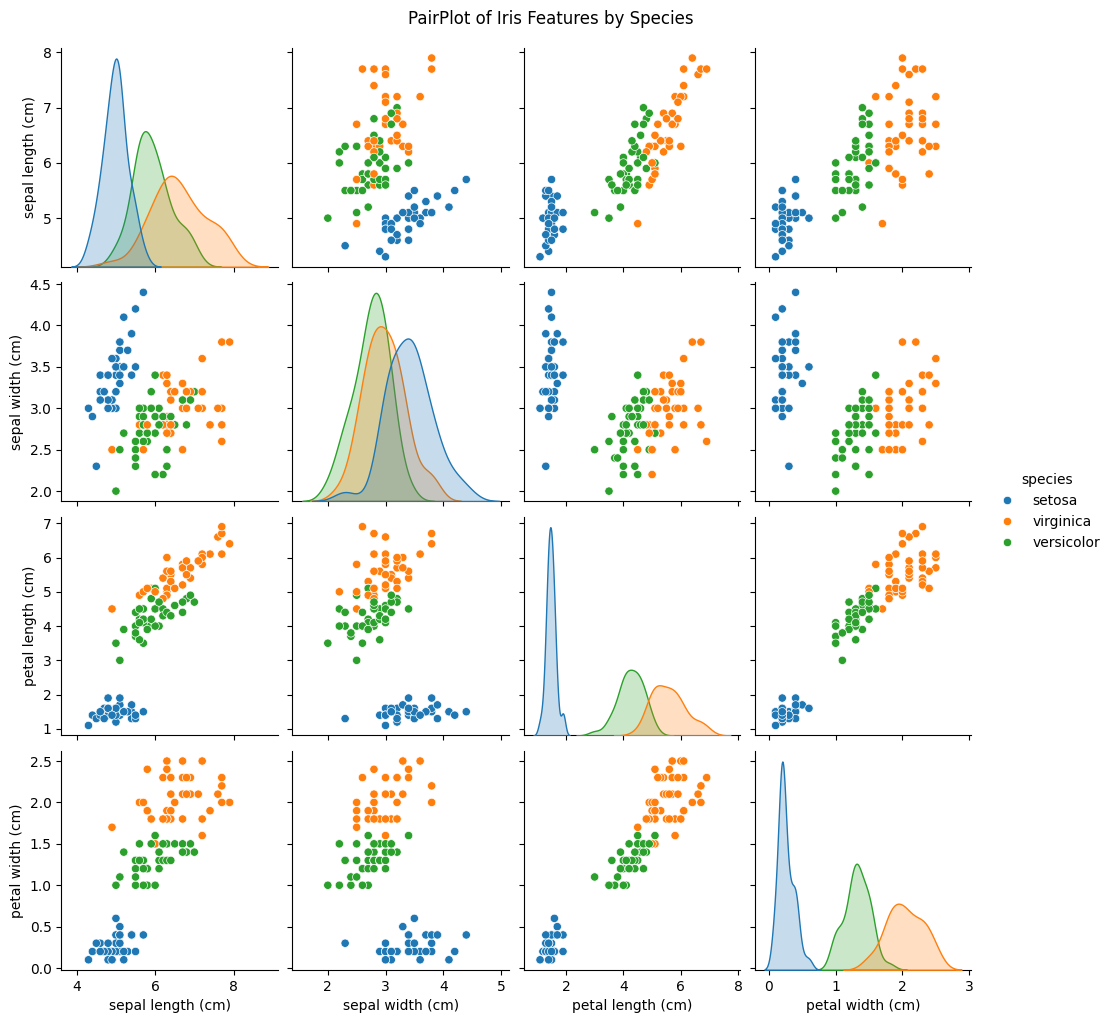

In [5]:
# Combine features and target for visualization
df = X_train_cv.copy()
df['species'] = y_train_cv
df['species'] = df['species'].apply(lambda x: target_names[x])

# Create a PairPlot for feature-wise inspection
sns.pairplot(df, hue='species', height=2.5)
plt.suptitle('PairPlot of Iris Features by Species', y=1.02)
plt.show()

# Drop the species column after plotting
df = df.drop(columns=['species'])

In [6]:
# Define the range of k values to test
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)

# Initialize KNN model
knn = KNeighborsClassifier()

# Setup GridSearchCV: Test all k values using 10-Fold Cross-Validation
grid_search = GridSearchCV(
    knn,
    param_grid,
    cv=10,
    scoring='accuracy',
    return_train_score=False,
    n_jobs=-1
)

# Fit the grid search to the training/CV data
grid_search.fit(X_train_cv, y_train_cv)

# Extract the optimal k and best score
optimal_k = grid_search.best_params_['n_neighbors']
best_cv_score = grid_search.best_score_

print(f"Optimal K found: {optimal_k}")
print(f"Best 10-Fold CV Score (Accuracy): {best_cv_score:.4f}")

Optimal K found: 5
Best 10-Fold CV Score (Accuracy): 0.9750


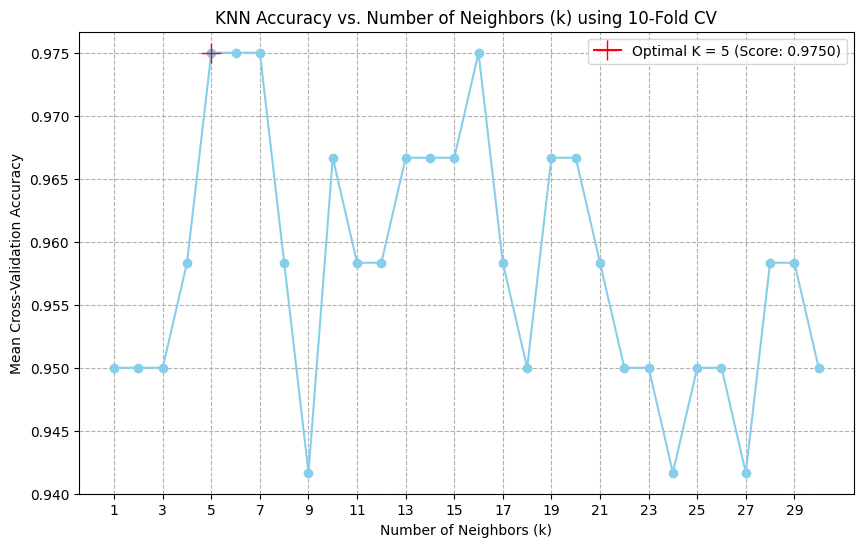

In [7]:
# Extract mean test scores for plotting
mean_scores = grid_search.cv_results_['mean_test_score']

plt.figure(figsize=(10, 6))
plt.plot(k_range, mean_scores, marker='o', linestyle='-', color='skyblue')
plt.plot(optimal_k, best_cv_score, marker='+', markersize=15, color='red',
         label=f'Optimal K = {optimal_k:.0f} (Score: {best_cv_score:.4f})')

plt.title('KNN Accuracy vs. Number of Neighbors (k) using 10-Fold CV')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Cross-Validation Accuracy')
plt.grid(True, linestyle='--')
plt.legend()
plt.xticks(np.arange(1, 31, 2))
plt.show()

In [8]:
# Instantiate the final model with the optimal k
final_knn = KNeighborsClassifier(n_neighbors=optimal_k)

# Train the final model on the entire training/CV set
final_knn.fit(X_train_cv, y_train_cv)

# Predict on the independent test set
y_pred_test = final_knn.predict(X_test)

--- FINAL MODEL PERFORMANCE (Optimal K=5) ---
Independent Test Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00        10
   virginica       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



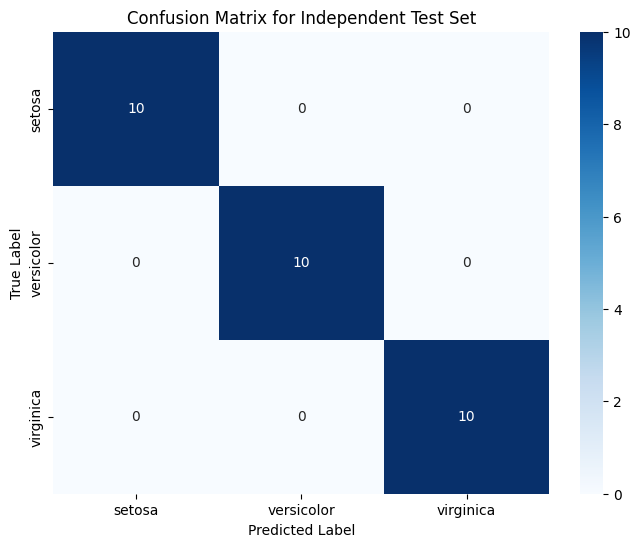

In [9]:
final_test_accuracy = accuracy_score(y_test, y_pred_test)

print(f"--- FINAL MODEL PERFORMANCE (Optimal K={optimal_k}) ---")
print(f"Independent Test Accuracy: {final_test_accuracy:.4f}\n")

print("Classification Report:")
print(classification_report(y_test, y_pred_test, target_names=target_names))

# Visualize the Confusion Matrix
cm = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Independent Test Set')
plt.show()